In [79]:
# Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [80]:
# Reading the dataset
data = pd.read_csv(r"C:\Users\alana\Documents\TecMTY\Esiee\Machine_Learning\Project\X_train.csv")

# Printing the five columns of our dataset
data.head(5)

,Protocol,Info,Length,Delta,Type
0,HCI_EVT,Rcvd Link Key Request,9,0.010473,au_rand_flooding
1,HCI_CMD,Sent Link Key Request Negative Reply,10,0.010473,au_rand_flooding
2,HCI_EVT,Rcvd Link Key Request,9,0.017913,au_rand_flooding
3,HCI_EVT,Rcvd Command Complete (Link Key Request Negati...,13,0.002642,au_rand_flooding
4,HCI_CMD,Sent Link Key Request Negative Reply,10,0.002882,au_rand_flooding


Visualization of our dataset

In [81]:
# Size of the dataset
print("Length of the dataset: ", len(data))

# Use of columns to see the variables
print("Columns: ", data.columns)

# Check the type of data for each column
print(data.dtypes)

Length of the dataset:  6402
Columns:  Index(['Protocol', 'Info', 'Length', 'Delta', 'Type'], dtype='object')
Protocol     object
Info         object
Length        int64
Delta       float64
Type         object
dtype: object


In [82]:
# Number of times that each distinct value of a variable occurs
data['Type'].value_counts()

normal                             4055
au_rand_flooding                    526
truncated_sco_link_request          304
duplicated_iocap                    277
invalid_feature_page_execution      239
truncated_lmp_accepted              236
invalid_timing_accuracy             188
feature_response_flooding           161
lmp_overflow_dm1                    142
lmp_auto_rate_overflow              124
duplicated_encapsulated_payload      94
invalid_setup_complete               56
Name: Type, dtype: int64

In [83]:
# Seen if there is non-readable data
data.notnull().sum()

Protocol    6402
Info        6402
Length      6402
Delta       6402
Type        6402
dtype: int64

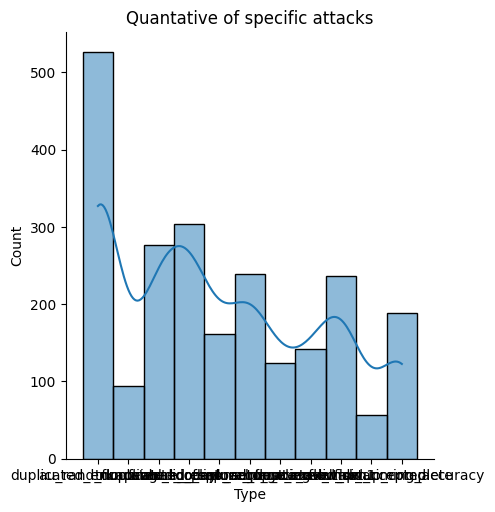

In [84]:
# Filtering normal variable
filtered_data = data[data['Type'] != 'normal']

# Making a histogram for the variable type
sns.displot(data=filtered_data['Type'], kde = True)
plt.title("Quantative of specific attacks")
plt.show()